# <p style="background-color:red;font-family:newtimeroman;color:white;font-size:150%;text-align:center;border-radius:20px 60px;">Ceratizit - CASE</p>

# Cihan Yatbaz

## 05/07/2021

-------------


1. Data Preprocessing
    1. Data Structure Control 
    2. Building the Target Variable 
    


2. Data Analysis
    1. Outlier Handling
    2. Missing Value Imputation
    3. Encoding for Categorical Features
    4. Normalization
    5. Feature Importance
    


3. Modelling
    1. Model Scores Comparison
    2. Roc-Auc Compression
    3. Predictions for Test Data





# Introduction:

## Explanation of the Features:

* **enrollee_id** : Unique ID for candidate
* **city** : City code
* **city_development_index** : Developement index of the city (scaled)
* **gender** : Gender of candidate
* **relevent_experience** : Relevant experience of candidate
* **enrolled_university** : Type of University course enrolled if any
* **education_level** : Education level of candidate
* **major_discipline**  : Education major discipline of candidate
* **experience** : Candidate total experience in years
* **company_size** : No of employees in current employer's company
* **company_type**  : Type of current employer
* **lastnewjob** : Difference in years between previous job and current job
* **training_hours** : training hours completed
* **target**  : 0 – Not looking for job change, 1 – Looking for a job change












## **1. Data Preprocessing**



In [150]:
import pandas as pd
import numpy as np

In [151]:
df_train = pd.read_csv('aug_train.csv')
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [154]:
df_test = pd.read_csv('aug_test.csv')
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [155]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


### **1.1. Data Structure Control**

In [156]:
def SimpleDataAnalysis(data): 
  import psutil, os, gc, time
  import io
  import pandas as pd
  from itertools import groupby 
  print('Simple data analysis has began :\n')
  proc=psutil.Process(os.getpid())
  gc.collect()
  mem_0=proc.memory_info().rss
  start_time=time.time()

  
  entry_length_list = [] 
  variable_name_list = []
  total_entry_list = [] 
  number_of_missing_values_list = []
  ratio_of_missing_values_list = []
  data_types_list = []
  unique_values_list = []
  number_of_unique_values_list = []

  for col in data.columns:
    buffer = io.StringIO()
    data[[col]].info(buf=buffer)
    data_info = buffer.getvalue().split('\n')
    entry_length = int(data_info[1].split(' ')[1])
    
    a = [''.join(j).strip() for sub in data_info[5].split(' ')
    for k, j in groupby(sub, str.isdigit)]
    
    variable_name = a[1]
    total_entry = int(a[2])
    number_of_missing_values = entry_length-total_entry
    ratio_of_missing_values = round(float(number_of_missing_values/entry_length),4)
    data_type =a[4]
    number_of_unique_values = len(data[col].unique())
    unique_values = data[col].unique()

  

    entry_length_list.append(entry_length)
    variable_name_list.append(variable_name)
    total_entry_list.append(total_entry)
    number_of_missing_values_list.append(number_of_missing_values)
    ratio_of_missing_values_list.append(ratio_of_missing_values)
    data_types_list.append(data_type)
    unique_values_list.append(unique_values)
    number_of_unique_values_list.append(number_of_unique_values)

  data_info_data=pd.DataFrame({'Variable_Name':variable_name_list,'Total_Entry(#)':total_entry_list,'Missing_Value(#)':number_of_missing_values_list,'Missing_Value(%)':ratio_of_missing_values_list,'Data_Type':data_types_list,'Unique_Values':unique_values_list,'Unique_Value(#)':number_of_unique_values_list})
  print("Simple data analysis has been completed in %s minutes !"%((time.time()-start_time)/60))

  return data_info_data.sort_values(by='Missing_Value(%)',ascending=False)

In [157]:
#SimpleDataAnalysis show us some information of data
df_train_info = SimpleDataAnalysis(df_train) 
df_train_info

Simple data analysis has began :

Simple data analysis has been completed in 0.001150043805440267 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
10,company_type,13018,6140,0.3205,object,"[nan, Pvt Ltd, Funded Startup, Early Stage Sta...",7
9,company_size,13220,5938,0.3099,object,"[nan, 50-99, <10, 10000+, 5000-9999, 1000-4999...",9
3,gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4
7,major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7
6,education_level,18698,460,0.0240,object,"[Graduate, Masters, High School, nan, Phd, Pri...",6
11,last_new_job,18735,423,0.0221,object,"[1, >4, never, 4, 3, 2, nan]",7
5,enrolled_university,18772,386,0.0201,object,"[no_enrollment, Full time course, nan, Part ti...",4
8,experience,19093,65,0.0034,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23
0,enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158
1,city,19158,0,0.0000,object,"[city_103, city_40, city_21, city_115, city_16...",123


In [158]:
#SimpleDataAnalysis show us some information of data
df_test_info=SimpleDataAnalysis(df_test) 
df_test_info

Simple data analysis has began :

Simple data analysis has been completed in 0.0007505377133687337 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
10,company_type,1495,634,0.2978,object,"[nan, Pvt Ltd, Funded Startup, Other, Public S...",7
9,company_size,1507,622,0.2922,object,"[<10, nan, 10/49, 10000+, 100-500, 50-99, 1000...",9
3,gender,1621,508,0.2386,object,"[Male, Female, nan, Other]",4
7,major_discipline,1817,312,0.1465,object,"[STEM, nan, Other, Business Degree, Arts, Huma...",7
6,education_level,2077,52,0.0244,object,"[Graduate, High School, Masters, nan, Phd, Pri...",6
11,last_new_job,2089,40,0.0188,object,"[1, never, >4, 2, 4, 3, nan]",7
5,enrolled_university,2098,31,0.0146,object,"[Full time course, no_enrollment, Part time co...",4
8,experience,2124,5,0.0023,object,"[9, 5, <1, 11, >20, 10, 14, 3, 20, 8, 4, 13, 2...",23
0,enrollee_id,2129,0,0.0000,int,"[32403, 9858, 31806, 27385, 27724, 217, 21465,...",2129
1,city,2129,0,0.0000,object,"[city_41, city_103, city_21, city_13, city_23,...",108


* As ratio of the missing values are alike df_train. We will only go with df_train and do the same operations to the df_test after here.

In [160]:
df_train_dictionary = df_train_info.set_index("Variable_Name")
df_train_dictionary

,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
Variable_Name,,,,,,
company_type,13018,6140,0.3205,object,"[nan, Pvt Ltd, Funded Startup, Early Stage Sta...",7
company_size,13220,5938,0.3099,object,"[nan, 50-99, <10, 10000+, 5000-9999, 1000-4999...",9
gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4
major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7
education_level,18698,460,0.0240,object,"[Graduate, Masters, High School, nan, Phd, Pri...",6
last_new_job,18735,423,0.0221,object,"[1, >4, never, 4, 3, 2, nan]",7
enrolled_university,18772,386,0.0201,object,"[no_enrollment, Full time course, nan, Part ti...",4
experience,19093,65,0.0034,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23
enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158


In [161]:
# We will add variable structure for each columns
df_train_dictionary["Variable_Structure"] = ['nominal','ordinal','nominal','nominal','ordinal', \
                                             'ordinal','ordinal','ordinal','discrete', \
                                             'nominal','continuous','ordinal','discrete','discrete']

df_train_dictionary  

,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#),Variable_Structure
Variable_Name,,,,,,,
company_type,13018,6140,0.3205,object,"[nan, Pvt Ltd, Funded Startup, Early Stage Sta...",7,nominal
company_size,13220,5938,0.3099,object,"[nan, 50-99, <10, 10000+, 5000-9999, 1000-4999...",9,ordinal
gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4,nominal
major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7,nominal
education_level,18698,460,0.0240,object,"[Graduate, Masters, High School, nan, Phd, Pri...",6,ordinal
last_new_job,18735,423,0.0221,object,"[1, >4, never, 4, 3, 2, nan]",7,ordinal
enrolled_university,18772,386,0.0201,object,"[no_enrollment, Full time course, nan, Part ti...",4,ordinal
experience,19093,65,0.0034,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23,ordinal
enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158,discrete


In [162]:
#We will add how we impute missing values
df_train_dictionary["missing_value_fulfillment_list"] = ["simple/distribution imputation", "simple/distribution imputation", "simple/distribution imputation", \
                                                           "simple/distribution imputation", "simple imputation", "simple imputation", "simple imputation", \
                                                           "simple imputation", np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

df_train_dictionary

,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#),Variable_Structure,missing_value_fulfillment_list
Variable_Name,,,,,,,,
company_type,13018,6140,0.3205,object,"[nan, Pvt Ltd, Funded Startup, Early Stage Sta...",7,nominal,simple/distribution imputation
company_size,13220,5938,0.3099,object,"[nan, 50-99, <10, 10000+, 5000-9999, 1000-4999...",9,ordinal,simple/distribution imputation
gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4,nominal,simple/distribution imputation
major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7,nominal,simple/distribution imputation
education_level,18698,460,0.0240,object,"[Graduate, Masters, High School, nan, Phd, Pri...",6,ordinal,simple imputation
last_new_job,18735,423,0.0221,object,"[1, >4, never, 4, 3, 2, nan]",7,ordinal,simple imputation
enrolled_university,18772,386,0.0201,object,"[no_enrollment, Full time course, nan, Part ti...",4,ordinal,simple imputation
experience,19093,65,0.0034,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23,ordinal,simple imputation
enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158,discrete,NaN


* Basically we sumurized, how we will the operations before training the model

## **1.2. Building the Target Variable**

In [164]:
%matplotlib inline
# Histogram of the target categories

def histogram(df, feature):
    """
    Building the Target Variables.
    
    #df = input("Enter a DataFrame name: ")
    #feature = input("Enter a target column name: ")
    
    """
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    #ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # And use a MultipleLocator to ensure a tick spacing of 10
    #ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    #plt.savefig('col.png')
    del ncount, x, y

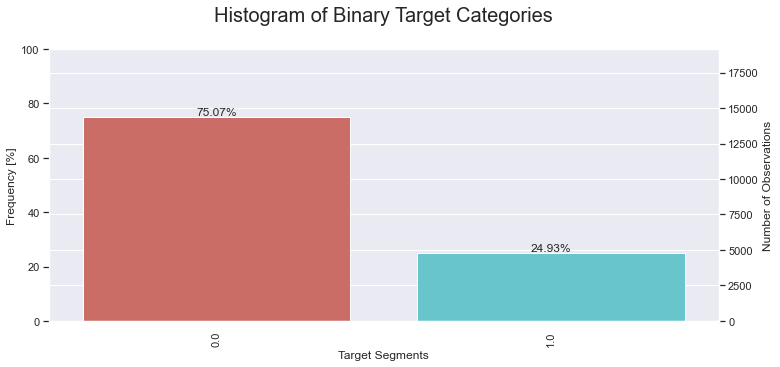

In [165]:
# histogram graphic of target values for train set
histogram(df_train,"target")

In [ ]:
1. Data Preprocessing
1.1. Data Structure Control 
1.2 Building the Target Variable 

2. Data Analysis

# **2. Data Analysis**

In [168]:
# we will find and define numerical columns
numerical_columns = list(df_train_dictionary.loc[(df_train_dictionary.loc[:,"Variable_Structure"]=="discrete") |
                                       (df_train_dictionary.loc[:,"Variable_Structure"]=="continuous")].index)
len(numerical_columns), numerical_columns

(4, ['enrollee_id', 'city_development_index', 'training_hours', 'target'])

* Delete target

In [184]:
numerical_columns

['enrollee_id', 'city_development_index', 'training_hours', 'target']

In [185]:
print(numerical_columns.pop(-1))

target


In [186]:
numerical_columns

['enrollee_id', 'city_development_index', 'training_hours']

In [187]:
# we will find and define categorical columns
categorical_columns = list(df_train_dictionary.loc[(df_train_dictionary.Variable_Structure=="nominal") | (df_train_dictionary.Variable_Structure=="ordinal")].index)
len(categorical_columns), categorical_columns

(10,
 ['company_type',
  'company_size',
  'gender',
  'major_discipline',
  'education_level',
  'last_new_job',
  'enrolled_university',
  'experience',
  'city',
  'relevent_experience'])

In [188]:
# THIS METHOD IS DROPPING COLUMNS HAVING [nan,0.0] UNIQUE VALUES...WE SHOULD CONVERT THEM TO CATEGORIC!

def ZeroVarianceFinder(df, numerical_columns):
  
  import pandas as pd
  import numpy as np

  zerovariance_numerical_features=[]
  for col in numerical_columns:
      try:
          if pd.DataFrame(df[col]).describe().loc['std'][0] == 0.00 or \
          np.isnan(pd.DataFrame(df[col]).describe().loc['std'][0]):
              zerovariance_numerical_features.append(col)
      except:
          print("Error:",col)
  return zerovariance_numerical_features

In [189]:
#zero variance columns for train
zerovariance_train_numerical_features = ZeroVarianceFinder(df_train,numerical_columns) 
zerovariance_train_numerical_features

[]

In [190]:
#zero variance columns for test
zerovariance_test_numerical_features = ZeroVarianceFinder(df_test,numerical_columns) 
zerovariance_test_numerical_features

[]

* There is no feature with variance= 0. That means we don't have a feature that have too many 0

### **2.1. Outlier Handling**

In [192]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

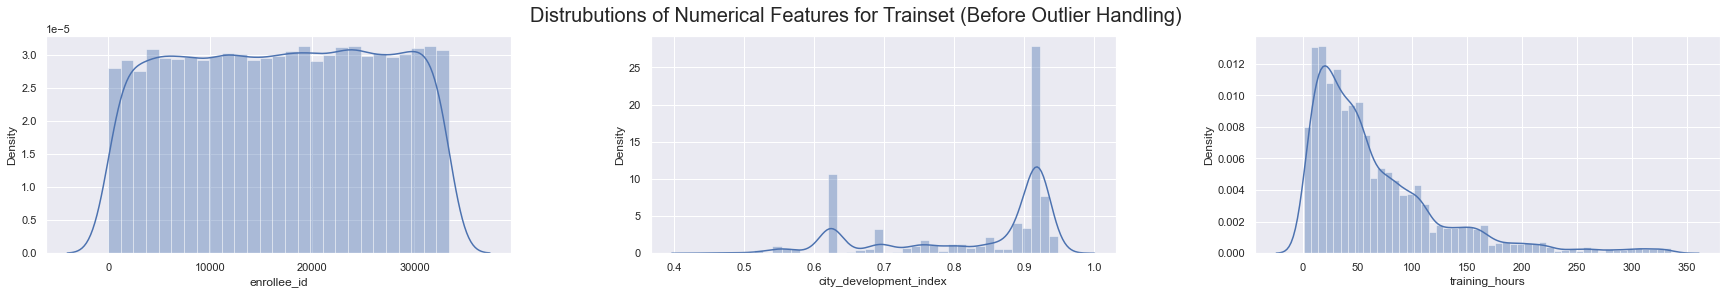

In [193]:
fig = plt.figure()
fig.suptitle("Distrubutions of Numerical Features for Trainset (Before Outlier Handling)",fontsize = 20)
fig.set_size_inches(w = 30, h = 4)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i, col in enumerate(numerical_columns):
    ax = fig.add_subplot(1,len(numerical_columns), i+1)
    sns.distplot(df_train.loc[:,col])
        

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

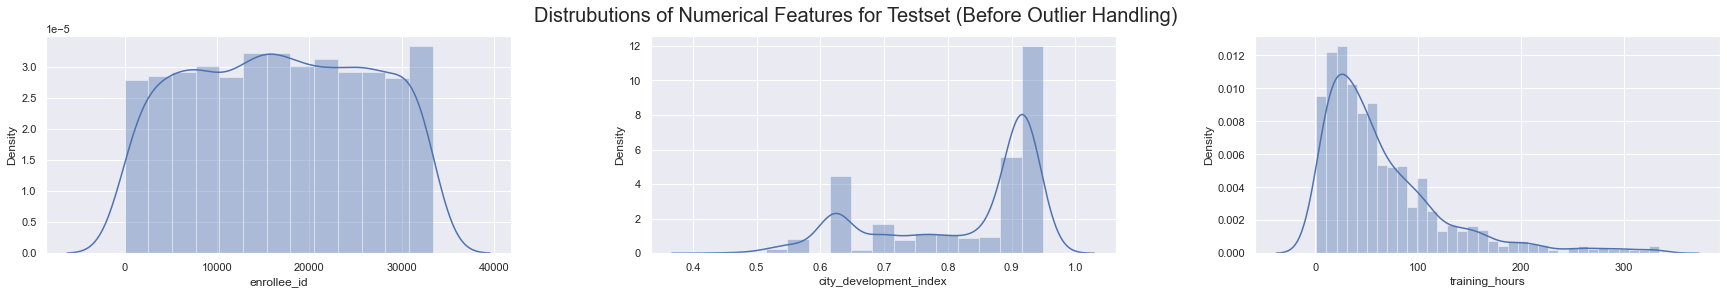

In [195]:
fig = plt.figure()
fig.suptitle("Distrubutions of Numerical Features for Testset (Before Outlier Handling)",fontsize = 20)
fig.set_size_inches(w = 30, h = 4)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i, col in enumerate(numerical_columns):
    ax = fig.add_subplot(1,len(numerical_columns), i+1)
    sns.distplot(df_test.loc[:,col])

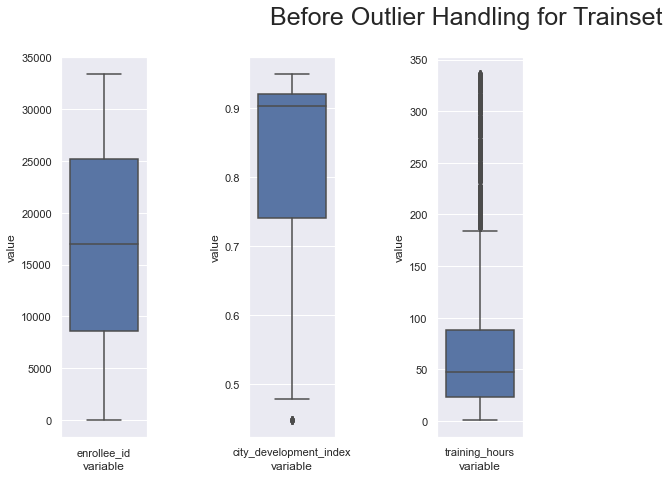

In [196]:
melted_features = []
fig = plt.figure()
fig.set_size_inches(w = 15, h = 7)
fig.subplots_adjust(hspace=0.4, wspace=1.2)
fig.suptitle("Before Outlier Handling for Trainset", fontsize = 25)

for i, col in enumerate(numerical_columns):
    
    melted_features.append(pd.melt(df_train,value_vars = col))
    ax = fig.add_subplot(1, 5, i+1)
    # ax.set(ylim=(-16000, 40000))
    sns.boxplot(x = "variable", y = "value",data= melted_features[i])

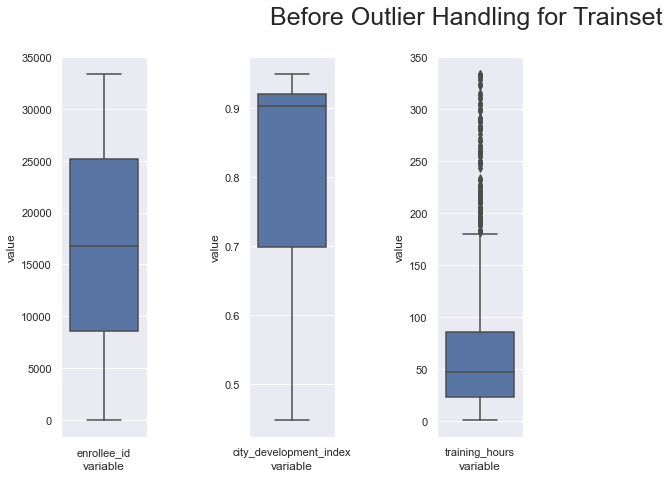

In [197]:
melted_features = []
fig = plt.figure()
fig.set_size_inches(w = 15, h = 7)
fig.subplots_adjust(hspace=0.4, wspace=1.2)
fig.suptitle("Before Outlier Handling for Trainset", fontsize = 25)

for i, col in enumerate(numerical_columns):
    melted_features.append(pd.melt(df_test,value_vars = col))
    ax = fig.add_subplot(1, 5, i+1)
    # ax.set(ylim=(-16000, 40000))
    sns.boxplot(x = "variable", y = "value",data= melted_features[i])

* As you can see we only have outlier for training hours

In [198]:
# skewness along the index axis 
df_train_skewness = df_train[numerical_columns].skew(axis = 0, skipna = True)
df_test_skewness = df_test[numerical_columns].skew(axis = 0, skipna = True)

# # Change the direction of skewness of 'left_skewed_columns':
# for col in left_skewed_columns:
#     if df_train[df_train[col]!=df_train[col].mode()[0]][col].median() < -1:
#         df_train.loc[:,col] *= -1
#     else:
#         continue
        
sparse_columns=[]
for col in numerical_columns:
    
    if (df_train[col].quantile(0.01)==df_train[col].quantile(0.25)==df_train[col].mode()[0]):
        sparse_columns.append(col)

print("data_train_skewness:\n",df_train_skewness,"\n")
print("data_test_skewness:\n",df_test_skewness,"\n")
print("sparse_columns:",sparse_columns)

data_train_skewness:
 enrollee_id              -0.018391
city_development_index   -0.995428
training_hours            1.819237
dtype: float64 

data_test_skewness:
 enrollee_id              -0.015213
city_development_index   -0.923030
training_hours            1.876451
dtype: float64 

sparse_columns: []


#### **---- IQR**

Extreme Cleaning:

lower_threshold: Below the first quartile (Q1) − 3 ∗ interquartile range (IQR)

upper_threshold: Above the third quartile (Q3) + 3 ∗ interquartile range (IQR)

Standard Cleaning:

lower_threshold: Below the first quartile (Q1) − 1.5 ∗ interquartile range (IQR)

upper_threshold: Above the third quartile (Q3) + 1.5 ∗ interquartile range (IQR)

where 'IQR' is equal to [Q3-Q1]=[third_quartile - first_quartile]. This technique has disadvantages while dealing with sparse columns, since taking the middle lenght (75%-25%) may bring zero distanced IQR.

* For train

In [199]:
iqr_df = pd.DataFrame(index = numerical_columns, columns = ["Q1","Q3","IQR","Lower-Bound","Lower-Outlier-Value","Upper-Bound","Upper-Outlier-Value", "#-of-Outliers"])
df_train_outlier_cleaned = df_train.copy()

for col in numerical_columns:

  if (col !=  "enrollee_id") and (col !=  "city_development_index"):
    q1 = df_train_outlier_cleaned.describe().loc['25%',col]
    q3 = df_train_outlier_cleaned.describe().loc['75%',col]
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    number_of_outlier = df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]<lower_bound) | (df_train_outlier_cleaned.loc[:,col]>upper_bound)].shape[0]

    print("Col Name:",col)

    if lower_bound < 0:
      lower_outlier_value = lower_bound * 1.25
    else:
      lower_outlier_value = lower_bound * 0.75

    iqr_df.loc[col,:] = [q1,q3,iqr,lower_bound,lower_outlier_value,upper_bound,upper_bound*1.25,number_of_outlier]

    df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]<lower_bound),col] =  lower_outlier_value
    df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]>upper_bound),col] =  upper_bound*1.25

  
    
iqr_df

Col Name: training_hours


,Q1,Q3,IQR,Lower-Bound,Lower-Outlier-Value,Upper-Bound,Upper-Outlier-Value,#-of-Outliers
enrollee_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
training_hours,23,88,65,-74.5,-93.125,185.5,231.875,984


* For test

In [200]:
iqr_df = pd.DataFrame(index = numerical_columns, columns = ["Q1","Q3","IQR","Lower-Bound","Lower-Outlier-Value","Upper-Bound","Upper-Outlier-Value", "#-of-Outliers"])
df_test_outlier_cleaned = df_test.copy()

for col in numerical_columns:

  if (col !=  "enrollee_id") and (col !=  "city_development_index"):
    q1 = df_test_outlier_cleaned.describe().loc['25%',col]
    q3 = df_test_outlier_cleaned.describe().loc['75%',col]
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    number_of_outlier = df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]<lower_bound) | (df_test_outlier_cleaned.loc[:,col]>upper_bound)].shape[0]

    print("Col Name:",col)

    if lower_bound < 0:
      lower_outlier_value = lower_bound * 1.25
    else:
      lower_outlier_value = lower_bound * 0.75

    iqr_df.loc[col,:] = [q1,q3,iqr,lower_bound,lower_outlier_value,upper_bound,upper_bound*1.25,number_of_outlier]

    df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]<lower_bound),col] =  lower_outlier_value
    df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]>upper_bound),col] =  upper_bound*1.25

  
    
iqr_df

Col Name: training_hours


,Q1,Q3,IQR,Lower-Bound,Lower-Outlier-Value,Upper-Bound,Upper-Outlier-Value,#-of-Outliers
enrollee_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
training_hours,23,86,63,-71.5,-89.375,180.5,225.625,122


##### **----- describe()**

In [201]:
df_train_outlier_cleaned.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,64.558722,0.249348
std,9616.292592,0.123362,56.688926,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,231.875000,1.000000


In [202]:
df_test_outlier_cleaned.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,63.929192
std,9576.846029,0.125074,56.049146
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,225.625000


##### **----- Distrubution Plot After Outlier Cleaning**

In [ ]:
* Train set

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


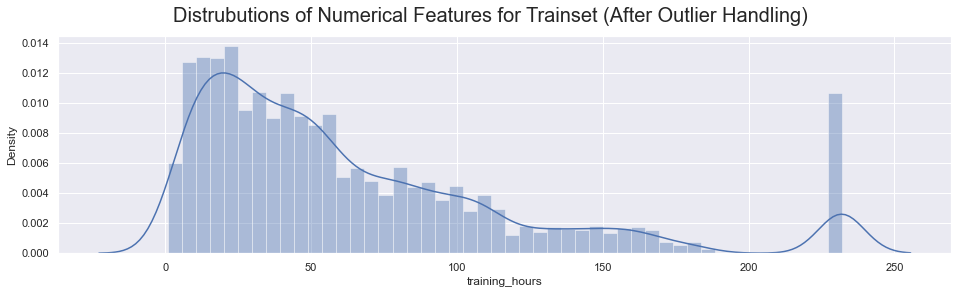

In [203]:
fig = plt.figure()
fig.suptitle("Distrubutions of Numerical Features for Trainset (After Outlier Handling)",fontsize = 20)
fig.set_size_inches(w = 16, h = 4)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i, col in enumerate(numerical_columns):
    if (col !=  "enrollee_id") and (col !=  "city_development_index"):
        #ax = fig.add_subplot(1,len(numerical_columns), i+1)
        sns.distplot(df_train_outlier_cleaned.loc[:,col])

* For Test set

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


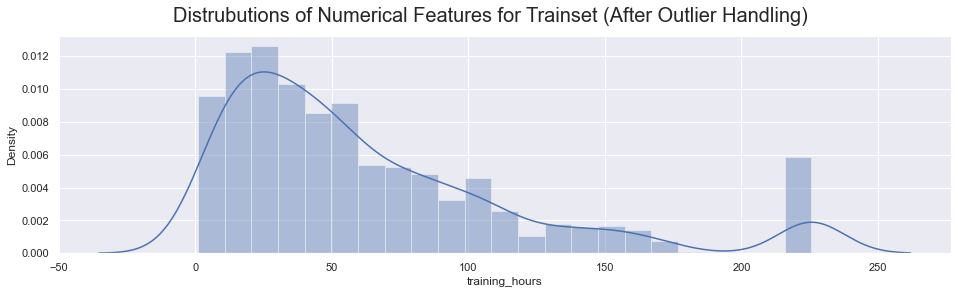

In [204]:
fig = plt.figure()
fig.suptitle("Distrubutions of Numerical Features for Trainset (After Outlier Handling)",fontsize = 20)
fig.set_size_inches(w = 16, h = 4)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i, col in enumerate(numerical_columns):
    if (col !=  "enrollee_id") and (col !=  "city_development_index"):
        #ax = fig.add_subplot(1,len(numerical_columns), i+1)
        sns.distplot(df_test_outlier_cleaned.loc[:,col])

##### **----- IQR Plots**

* Train set

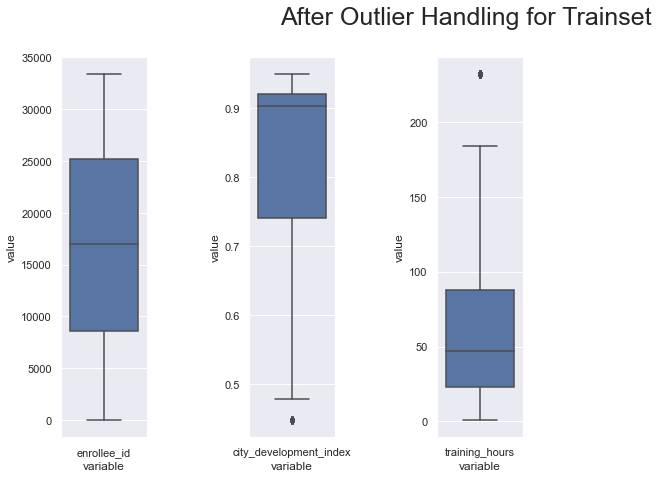

In [205]:
melted_features = []
fig = plt.figure()
fig.set_size_inches(w = 15, h = 7)
fig.subplots_adjust(hspace=0.4, wspace=1.2)
fig.suptitle("After Outlier Handling for Trainset", fontsize = 25)

for i, col in enumerate(numerical_columns):
    melted_features.append(pd.melt(df_train_outlier_cleaned,value_vars = col))
    ax = fig.add_subplot(1, 5, i+1)
    # ax.set(ylim=(-16000, 40000))
    sns.boxplot(x = "variable", y = "value",data= melted_features[i])

* Test set

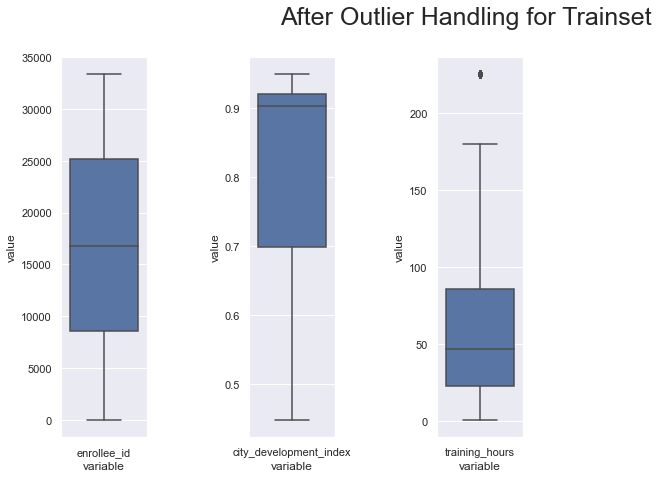

In [206]:
melted_features = []
fig = plt.figure()
fig.set_size_inches(w = 15, h = 7)
fig.subplots_adjust(hspace=0.4, wspace=1.2)
fig.suptitle("After Outlier Handling for Trainset", fontsize = 25)

for i, col in enumerate(numerical_columns):
    melted_features.append(pd.melt(df_test_outlier_cleaned,value_vars = col))
    ax = fig.add_subplot(1, 5, i+1)
    # ax.set(ylim=(-16000, 40000))
    sns.boxplot(x = "variable", y = "value",data= melted_features[i])

### **2.2. Missing Value Imputation**

In [207]:
df_train_imputed = df_train_outlier_cleaned.copy()
df_test_imputed = df_test_outlier_cleaned.copy()

In [208]:
df_train_dictionary

,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#),Variable_Structure,missing_value_fulfillment_list
Variable_Name,,,,,,,,
company_type,13018,6140,0.3205,object,"[nan, Pvt Ltd, Funded Startup, Early Stage Sta...",7,nominal,simple/distribution imputation
company_size,13220,5938,0.3099,object,"[nan, 50-99, <10, 10000+, 5000-9999, 1000-4999...",9,ordinal,simple/distribution imputation
gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4,nominal,simple/distribution imputation
major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7,nominal,simple/distribution imputation
education_level,18698,460,0.0240,object,"[Graduate, Masters, High School, nan, Phd, Pri...",6,ordinal,simple imputation
last_new_job,18735,423,0.0221,object,"[1, >4, never, 4, 3, 2, nan]",7,ordinal,simple imputation
enrolled_university,18772,386,0.0201,object,"[no_enrollment, Full time course, nan, Part ti...",4,ordinal,simple imputation
experience,19093,65,0.0034,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23,ordinal,simple imputation
enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158,discrete,NaN


* As we planed here we will do the imputation operations one by one 

#### **---- For *company_type* Feature**

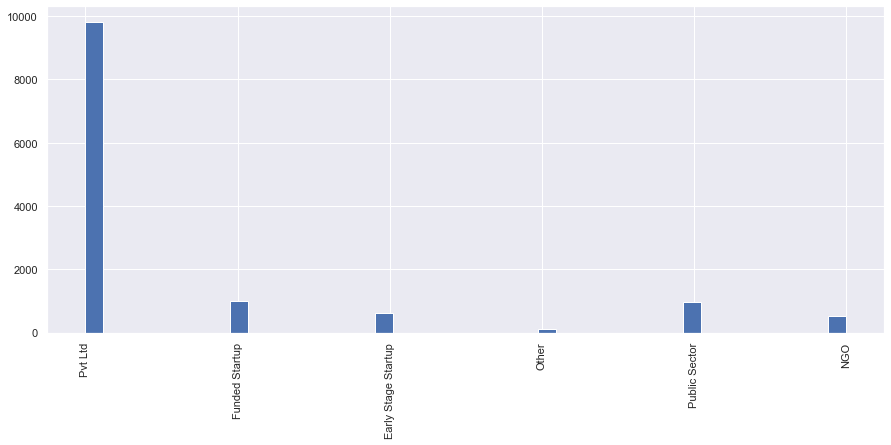

In [210]:
hist = df_train_imputed["company_type"].hist(bins=42,figsize=(15,6),xrot=90)

* As we have too many Pvt ltd, I will fill out the nan with that

In [212]:
df_train_imputed["company_type"].mode()[0]

'Pvt Ltd'

In [213]:
df_train_imputed["company_type"].replace(np.NaN,df_train_imputed["company_type"].mode()[0],inplace=True)
df_test_imputed["company_type"].replace(np.NaN,df_test_imputed["company_type"].mode()[0],inplace=True)

In [214]:
df_train_imputed_info = SimpleDataAnalysis(df_train_imputed)
df_train_imputed_info

Simple data analysis has began :

Simple data analysis has been completed in 0.0013661384582519531 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
9,company_size,13220,5938,0.3099,object,"[nan, 50-99, <10, 10000+, 5000-9999, 1000-4999...",9
3,gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4
7,major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7
6,education_level,18698,460,0.0240,object,"[Graduate, Masters, High School, nan, Phd, Pri...",6
11,last_new_job,18735,423,0.0221,object,"[1, >4, never, 4, 3, 2, nan]",7
5,enrolled_university,18772,386,0.0201,object,"[no_enrollment, Full time course, nan, Part ti...",4
8,experience,19093,65,0.0034,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23
0,enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158
1,city,19158,0,0.0000,object,"[city_103, city_40, city_21, city_115, city_16...",123
2,city_development_index,19158,0,0.0000,float,"[0.92, 0.7759999999999999, 0.624, 0.789, 0.767...",93


#### **---- For *company_size* Feature**

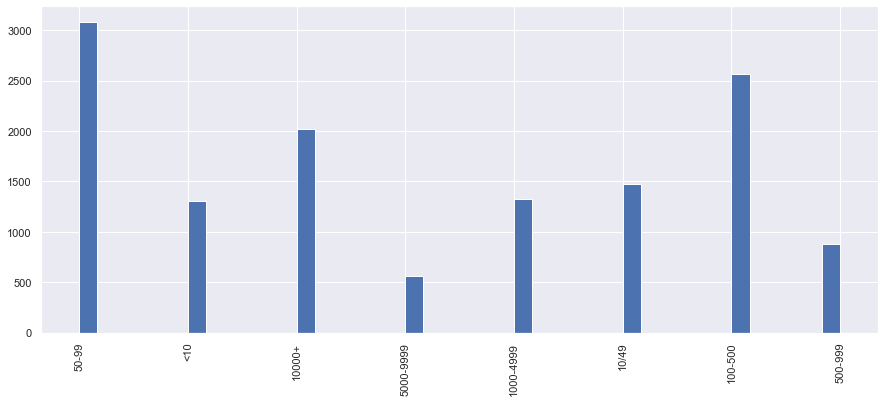

In [215]:
hist = df_train_imputed["company_size"].hist(bins=42,figsize=(15,6),xrot=90)

* As its distributed to the different sizes, I will do distribution imputation

In [ ]:
company_size_dist_ratio = df_train_imputed.company_size.value_counts(normalize=True)
company_size_dist_ratio

In [ ]:
company_size_dist_ratio_test = df_test_imputed.company_size.value_counts(normalize=True)
company_size_dist_ratio_test

In [ ]:
df_train_imputed.company_size.isnull().sum()

In [217]:
len(np.random.choice(company_size_dist_ratio.index, df_train_imputed.company_size.isnull().sum(), p=company_size_dist_ratio.values))

5938

In [218]:
missing_train = df_train_imputed['company_size'].isnull()
df_train_imputed.loc[missing_train,'company_size'] = np.random.choice(company_size_dist_ratio.index, df_train_imputed.company_size.isnull().sum(), p=company_size_dist_ratio.values)

In [219]:
df_train_imputed["company_size"].unique()

array(['100-500', '50-99', '1000-4999', '10000+', '<10', '5000-9999',
       '10/49', '500-999'], dtype=object)

* For test

In [221]:
missing_test = df_test_imputed['company_size'].isnull()
df_test_imputed.loc[missing_test,'company_size'] = np.random.choice(company_size_dist_ratio_test.index, df_test_imputed.company_size.isnull().sum(), p=company_size_dist_ratio_test.values)

In [222]:
df_train_imputed_info = SimpleDataAnalysis(df_train_imputed)
df_train_imputed_info

Simple data analysis has began :

Simple data analysis has been completed in 0.001317127545674642 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
3,gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4
7,major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7
6,education_level,18698,460,0.0240,object,"[Graduate, Masters, High School, nan, Phd, Pri...",6
11,last_new_job,18735,423,0.0221,object,"[1, >4, never, 4, 3, 2, nan]",7
5,enrolled_university,18772,386,0.0201,object,"[no_enrollment, Full time course, nan, Part ti...",4
8,experience,19093,65,0.0034,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23
0,enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158
1,city,19158,0,0.0000,object,"[city_103, city_40, city_21, city_115, city_16...",123
2,city_development_index,19158,0,0.0000,float,"[0.92, 0.7759999999999999, 0.624, 0.789, 0.767...",93
4,relevent_experience,19158,0,0.0000,object,"[Has relevent experience, No relevent experience]",2


#### **---- For *gender* Feature**

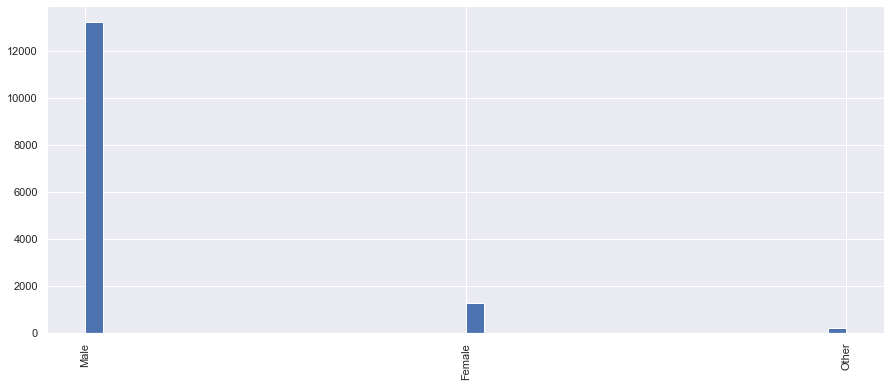

In [223]:
hist = df_train_imputed["gender"].hist(bins=42,figsize=(15,6),xrot=90)

* As we have too many Male person, I will fill out the nan with that

In [ ]:
df_train_imputed["gender"].replace(np.NaN,df_train_imputed["gender"].mode()[0],inplace=True)
df_test_imputed["gender"].replace(np.NaN,df_test_imputed["gender"].mode()[0],inplace=True)

In [ ]:
df_train_imputed_info = SimpleDataAnalysis(df_train_imputed)
df_train_imputed_info

#### **---- For *major_discipline* Feature**

In [ ]:
hist = df_train_imputed["major_discipline"].hist(bins=42,figsize=(15,6),xrot=90)

In [ ]:
* As we have too many STEM, I will fill out the nan with that

In [ ]:
df_train_imputed["major_discipline"].replace(np.NaN,df_train_imputed["major_discipline"].mode()[0],inplace=True)
df_test_imputed["major_discipline"].replace(np.NaN,df_test_imputed["major_discipline"].mode()[0],inplace=True)

In [ ]:
df_train_imputed_info = SimpleDataAnalysis(df_train_imputed)
df_train_imputed_info

#### **---- For *education_level* Feature**

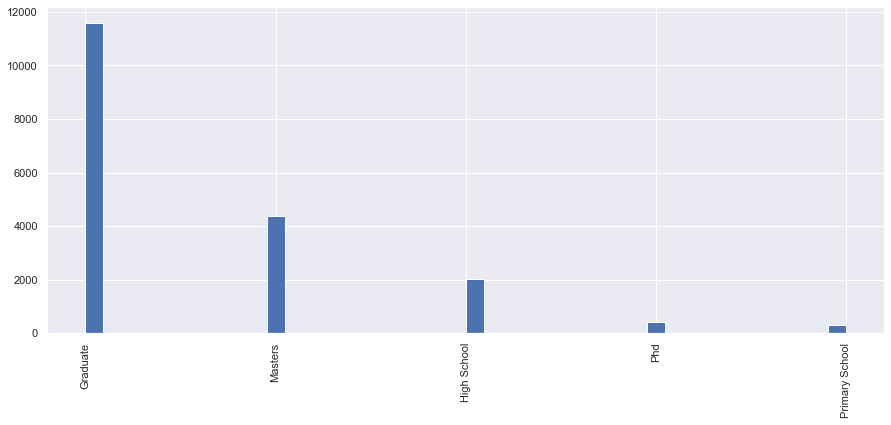

In [225]:
hist = df_train_imputed["education_level"].hist(bins=42,figsize=(15,6),xrot=90)

* It is kinda distrubuted but as number of "Graduate" level is too high, I will do the simple imputation

In [227]:
df_train_imputed["education_level"].replace(np.NaN,df_train_imputed["education_level"].mode()[0],inplace=True)
df_test_imputed["education_level"].replace(np.NaN,df_test_imputed["education_level"].mode()[0],inplace=True)

In [228]:
df_train_imputed_info = SimpleDataAnalysis(df_train_imputed)
df_train_imputed_info

Simple data analysis has began :

Simple data analysis has been completed in 0.0015001575152079265 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
3,gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4
7,major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7
11,last_new_job,18735,423,0.0221,object,"[1, >4, never, 4, 3, 2, nan]",7
5,enrolled_university,18772,386,0.0201,object,"[no_enrollment, Full time course, nan, Part ti...",4
8,experience,19093,65,0.0034,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23
0,enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158
1,city,19158,0,0.0000,object,"[city_103, city_40, city_21, city_115, city_16...",123
2,city_development_index,19158,0,0.0000,float,"[0.92, 0.7759999999999999, 0.624, 0.789, 0.767...",93
4,relevent_experience,19158,0,0.0000,object,"[Has relevent experience, No relevent experience]",2
6,education_level,19158,0,0.0000,object,"[Graduate, Masters, High School, Phd, Primary ...",5


#### **---- For *last_new_job* Feature**

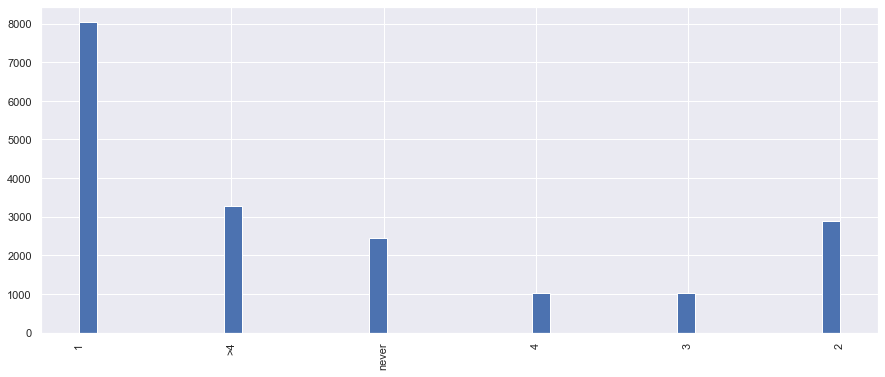

In [229]:
hist = df_train_imputed["last_new_job"].hist(bins=42,figsize=(15,6),xrot=90)

* As we have too many 1, I will fill out the nan with that

In [231]:
df_train_imputed["last_new_job"].replace(np.NaN,df_train_imputed["last_new_job"].mode()[0],inplace=True)
df_test_imputed["last_new_job"].replace(np.NaN,df_test_imputed["last_new_job"].mode()[0],inplace=True)

In [232]:
df_train_imputed_info = SimpleDataAnalysis(df_train_imputed)
df_train_imputed_info

Simple data analysis has began :

Simple data analysis has been completed in 0.001349488894144694 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
3,gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4
7,major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7
5,enrolled_university,18772,386,0.0201,object,"[no_enrollment, Full time course, nan, Part ti...",4
8,experience,19093,65,0.0034,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23
0,enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158
1,city,19158,0,0.0000,object,"[city_103, city_40, city_21, city_115, city_16...",123
2,city_development_index,19158,0,0.0000,float,"[0.92, 0.7759999999999999, 0.624, 0.789, 0.767...",93
4,relevent_experience,19158,0,0.0000,object,"[Has relevent experience, No relevent experience]",2
6,education_level,19158,0,0.0000,object,"[Graduate, Masters, High School, Phd, Primary ...",5
9,company_size,19158,0,0.0000,object,"[100-500, 50-99, 1000-4999, 10000+, <10, 5000-...",8


#### **---- For *enrolled_university* Feature**

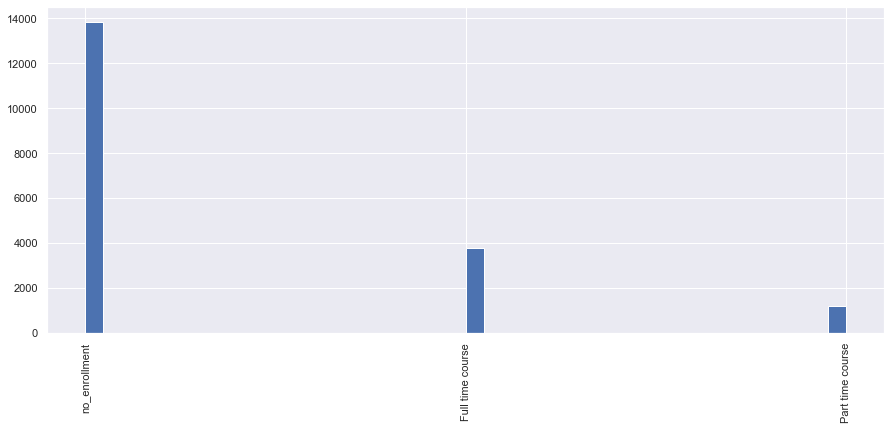

In [233]:
hist = df_train_imputed["enrolled_university"].hist(bins=42,figsize=(15,6),xrot=90)

* As we have too many "no_enrollment", I will fill out the nan with that

In [235]:
df_train_imputed["enrolled_university"].replace(np.NaN,df_train_imputed["enrolled_university"].mode()[0],inplace=True)
df_test_imputed["enrolled_university"].replace(np.NaN,df_test_imputed["enrolled_university"].mode()[0],inplace=True)

In [236]:
df_train_imputed_info = SimpleDataAnalysis(df_train_imputed)
df_train_imputed_info

Simple data analysis has began :

Simple data analysis has been completed in 0.0015659968058268229 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
3,gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4
7,major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7
8,experience,19093,65,0.0034,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23
0,enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158
1,city,19158,0,0.0000,object,"[city_103, city_40, city_21, city_115, city_16...",123
2,city_development_index,19158,0,0.0000,float,"[0.92, 0.7759999999999999, 0.624, 0.789, 0.767...",93
4,relevent_experience,19158,0,0.0000,object,"[Has relevent experience, No relevent experience]",2
5,enrolled_university,19158,0,0.0000,object,"[no_enrollment, Full time course, Part time co...",3
6,education_level,19158,0,0.0000,object,"[Graduate, Masters, High School, Phd, Primary ...",5
9,company_size,19158,0,0.0000,object,"[100-500, 50-99, 1000-4999, 10000+, <10, 5000-...",8


#### **---- For *experience* Feature**

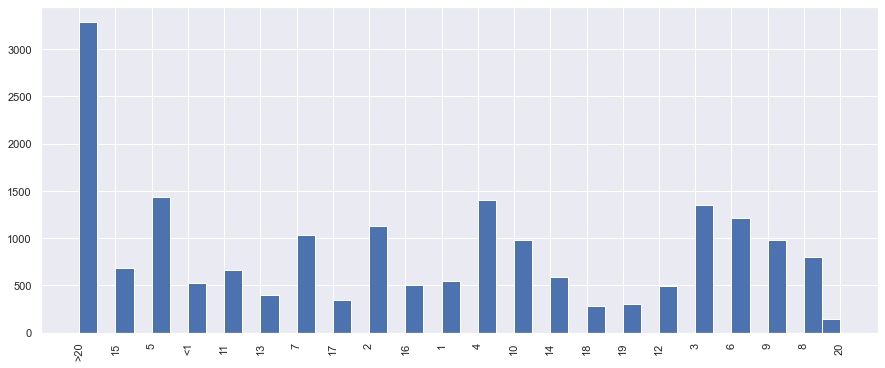

In [237]:
hist = df_train_imputed["experience"].hist(bins=42,figsize=(15,6),xrot=90)

* As we have too many ">20", I will fill out the nan with that

In [239]:
df_train_imputed["experience"].replace(np.NaN,df_train_imputed["experience"].mode()[0],inplace=True)
df_test_imputed["experience"].replace(np.NaN,df_test_imputed["experience"].mode()[0],inplace=True)

##### **----> Result**

In [240]:
df_train_imputed_info = SimpleDataAnalysis(df_train_imputed)
df_train_imputed_info

Simple data analysis has began :

Simple data analysis has been completed in 0.0015666802724202474 minutes !


,Variable_Name,Total_Entry(#),Missing_Value(#),Missing_Value(%),Data_Type,Unique_Values,Unique_Value(#)
3,gender,14650,4508,0.2353,object,"[Male, nan, Female, Other]",4
7,major_discipline,16345,2813,0.1468,object,"[STEM, Business Degree, nan, Arts, Humanities,...",7
0,enrollee_id,19158,0,0.0000,int,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158
1,city,19158,0,0.0000,object,"[city_103, city_40, city_21, city_115, city_16...",123
2,city_development_index,19158,0,0.0000,float,"[0.92, 0.7759999999999999, 0.624, 0.789, 0.767...",93
4,relevent_experience,19158,0,0.0000,object,"[Has relevent experience, No relevent experience]",2
5,enrolled_university,19158,0,0.0000,object,"[no_enrollment, Full time course, Part time co...",3
6,education_level,19158,0,0.0000,object,"[Graduate, Masters, High School, Phd, Primary ...",5
8,experience,19158,0,0.0000,object,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",22
9,company_size,19158,0,0.0000,object,"[100-500, 50-99, 1000-4999, 10000+, <10, 5000-...",8


### **2.3 Encoding for Categorical Features**

In [251]:
df_train_encoded = df_train_imputed.copy()
df_test_encoded = df_test_imputed.copy()

In [252]:
df_train_encoded = pd.concat([df_train_encoded, pd.get_dummies(df_train_encoded.select_dtypes(include='object'))], axis=1)

In [253]:
df_train_encoded.head(1)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,...,0,0,0,1,1,0,0,0,0,0


In [254]:
df_train_encoded = df_train_encoded.drop(df_train_encoded[categorical_columns], axis=1)

In [255]:
df_train_encoded.head(1)

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.92,36.0,1.0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0


* For Test Set

In [257]:
df_test_encoded = pd.concat([df_test_encoded, pd.get_dummies(df_test_encoded.select_dtypes(include='object'))], axis=1)
df_test_encoded = df_test_encoded.drop(df_test_encoded[categorical_columns], axis=1)
df_test_encoded.head(1)

,enrollee_id,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,32403,0.827,21.0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


### **2.4. Normalization**

In [263]:
df_train_norm = df_train_encoded.copy()
df_test_norm = df_test_encoded.copy()

In [264]:
df_train_norm[numerical_columns]

,enrollee_id,city_development_index,training_hours
0,8949,0.920,36.0
1,29725,0.776,47.0
2,11561,0.624,83.0
3,33241,0.789,52.0
4,666,0.767,8.0
...,...,...,...
19153,7386,0.878,42.0
19154,31398,0.920,52.0
19155,24576,0.920,44.0
19156,5756,0.802,97.0


In [265]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df_train_minmax = min_max_scaler.fit_transform(df_train_norm[numerical_columns])
df_train_norm[numerical_columns] = df_train_minmax
df_train_norm.head(2)

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.268073,0.942116,0.151597,1.0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,0.890500,0.654691,0.199242,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [266]:
# TEST SET
df_test_minmax = min_max_scaler.fit_transform(df_test_norm[numerical_columns])
df_test_norm[numerical_columns] = df_test_minmax
df_test_norm.head(2)

,enrollee_id,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.971514,0.756487,0.089037,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.295502,0.942116,0.431831,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0


* Column Differences

In [268]:
df_train_norm.columns.difference(df_test_norm.columns)

Index(['city_city_109', 'city_city_111', 'city_city_120', 'city_city_129',
       'city_city_131', 'city_city_140', 'city_city_146', 'city_city_166',
       'city_city_18', 'city_city_55', 'city_city_59', 'city_city_62',
       'city_city_7', 'city_city_8', 'city_city_81', 'target'],
      dtype='object')

In [269]:
df_train_norm.drop(['city_city_109', 'city_city_111', 'city_city_120', 'city_city_129', \
                    'city_city_131', 'city_city_140', 'city_city_146', 'city_city_166', \
                    'city_city_18', 'city_city_55', 'city_city_59', 'city_city_62', \
                    'city_city_7', 'city_city_8', 'city_city_81'], axis = 1, inplace = True)
df_train_norm.shape, df_test_norm.shape

((19158, 173), (2129, 172))

### **2.5. Feature Importance**

In [279]:
df_train_fi = df_train_norm.copy()
df_test_fi = df_test_norm.copy()

In [280]:
df_train_fi.columns

Index(['enrollee_id', 'city_development_index', 'training_hours', 'target',
       'city_city_1', 'city_city_10', 'city_city_100', 'city_city_101',
       'city_city_102', 'city_city_103',
       ...
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_1', 'last_new_job_2',
       'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never'],
      dtype='object', length=173)

In [281]:
target = df_train_fi.target.values
target

array([1., 0., 0., ..., 0., 0., 0.])

In [282]:
df_train_fi.drop(['target'], axis = 1, inplace = True)
df_train_fi.shape

(19158, 172)

[3.64750044e-02 2.60617962e-01 2.83802015e-02 1.24339218e-04
 3.51171145e-04 8.83191697e-04 2.96227451e-03 5.45027167e-04
 8.76217406e-03 1.79166260e-03 2.97662815e-04 1.87282591e-04
 2.77816262e-04 1.79734005e-02 1.86683889e-02 1.15247958e-03
 2.66615280e-04 1.59034413e-04 7.60922317e-04 1.14190265e-04
 0.00000000e+00 5.98738855e-04 7.93790583e-04 2.21155240e-05
 4.59214749e-03 1.05542488e-04 1.81224294e-05 3.85391754e-04
 4.22469759e-03 4.60139750e-04 1.29768213e-04 1.67280016e-04
 2.68099973e-05 5.84833978e-04 3.68788096e-04 2.35585491e-04
 2.84166509e-03 4.02425309e-04 5.99720172e-04 3.07841923e-04
 1.28654822e-03 7.10827174e-05 5.96197457e-04 2.36945064e-04
 1.26585460e-02 1.47121843e-03 6.47413742e-04 4.08395424e-04
 1.29709245e-04 4.49635585e-05 5.09282991e-04 5.06833994e-05
 2.64284696e-04 1.75084191e-04 1.44486165e-04 1.30406205e-03
 0.00000000e+00 1.10132606e-04 2.11862783e-01 7.97699299e-04
 3.72869159e-04 1.05972549e-04 3.30661351e-04 2.50739417e-04
 1.22431507e-03 1.107690

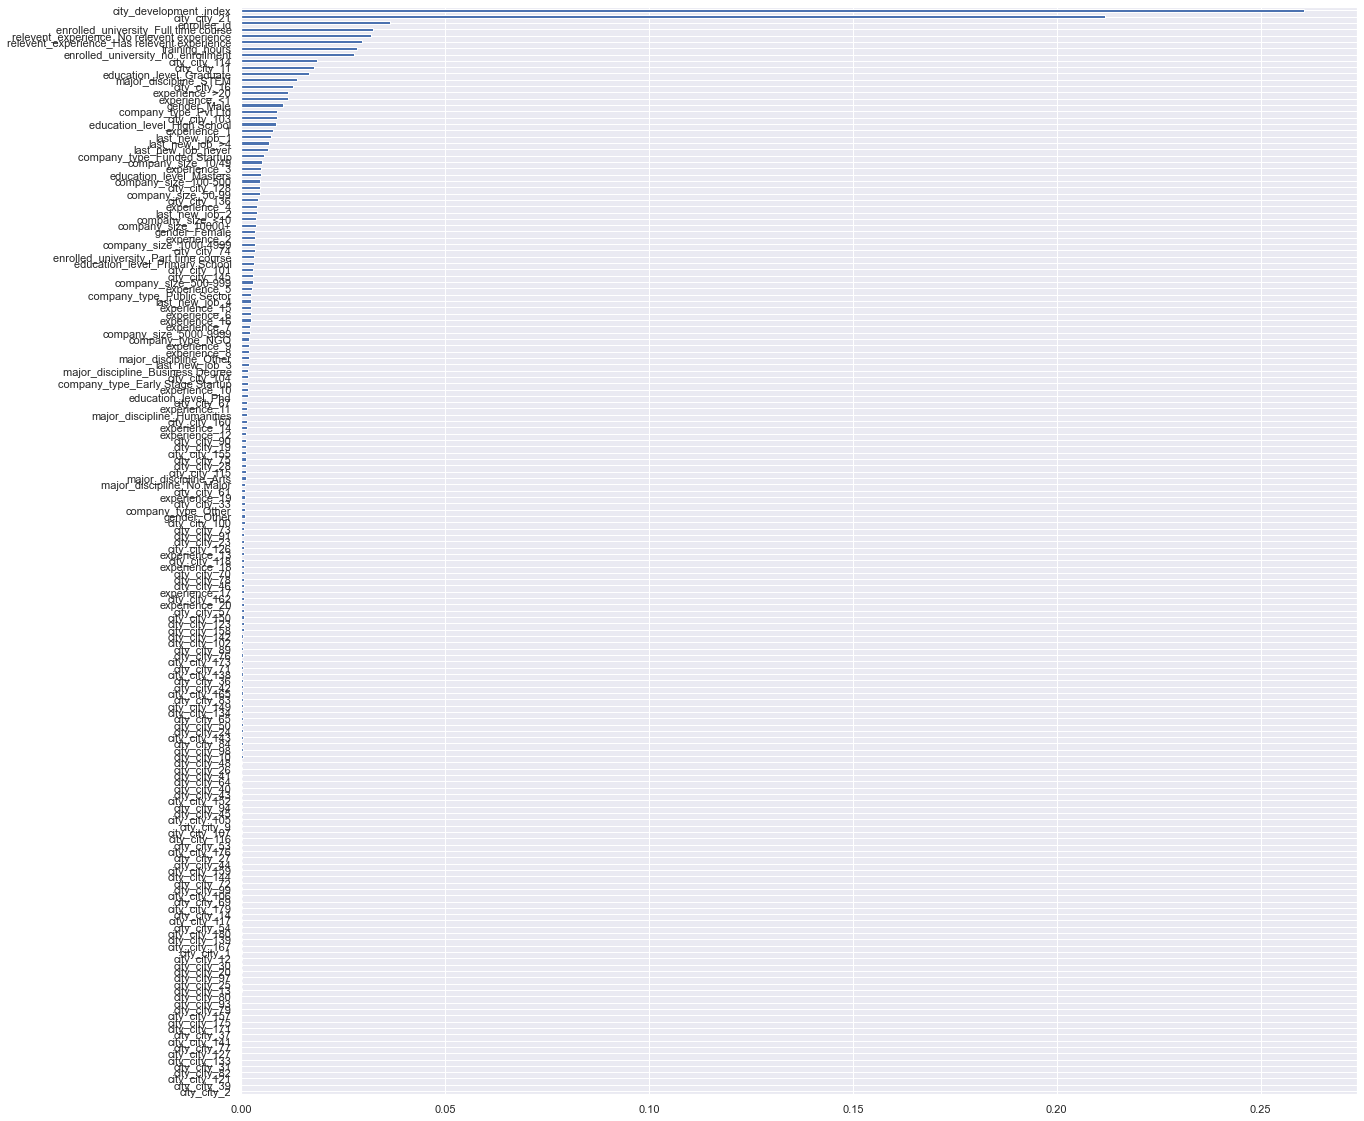

In [283]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model_rf= RandomForestClassifier(max_depth=10, random_state=42)
model_rf.fit(df_train_fi, target)
print(model_rf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_rf.feature_importances_,index=df_train_fi.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(20,20))

plt.show()


In [ ]:
# Remove after city_city_46

In [284]:
# city_city_46
feat_importances_sorted = feat_importances.sort_values(ascending=True).index
lst_feat_importances_sorted = feat_importances_sorted.to_list()
lst_feat_importances_sorted.index("city_city_46")
lst_feat_importances_sorted[0:lst_feat_importances_sorted.index("city_city_46")]

['city_city_2',
 'city_city_39',
 'city_city_121',
 'city_city_82',
 'city_city_31',
 'city_city_133',
 'city_city_127',
 'city_city_77',
 'city_city_141',
 'city_city_37',
 'city_city_171',
 'city_city_175',
 'city_city_157',
 'city_city_79',
 'city_city_93',
 'city_city_80',
 'city_city_13',
 'city_city_25',
 'city_city_97',
 'city_city_20',
 'city_city_30',
 'city_city_12',
 'city_city_1',
 'city_city_167',
 'city_city_139',
 'city_city_180',
 'city_city_54',
 'city_city_117',
 'city_city_14',
 'city_city_179',
 'city_city_69',
 'city_city_106',
 'city_city_99',
 'city_city_72',
 'city_city_144',
 'city_city_159',
 'city_city_44',
 'city_city_27',
 'city_city_176',
 'city_city_53',
 'city_city_116',
 'city_city_107',
 'city_city_9',
 'city_city_105',
 'city_city_45',
 'city_city_94',
 'city_city_152',
 'city_city_43',
 'city_city_40',
 'city_city_64',
 'city_city_41',
 'city_city_26',
 'city_city_48',
 'city_city_10',
 'city_city_98',
 'city_city_84',
 'city_city_143',
 'city_city_2

In [285]:
df_train_fi.shape, df_test_fi.shape

((19158, 172), (2129, 172))

In [286]:
# For One-Hot Encoding
df_train_fi.drop(lst_feat_importances_sorted[0:lst_feat_importances_sorted.index("city_city_46")], axis=1,inplace=True)
df_test_fi.drop(lst_feat_importances_sorted[0:lst_feat_importances_sorted.index("city_city_46")], axis=1,inplace=True)

In [287]:
df_train_fi.shape, df_test_fi.shape

((19158, 92), (2129, 92))

# **3. Modelling**

In [291]:
train_data = df_train_fi.copy()
test_data = df_test_fi.copy()

In [292]:
target

array([1., 0., 0., ..., 0., 0., 0.])

* Here we will only go with "train_data" and then test the "test_data"

In [293]:
# Train Test split
from sklearn.model_selection import train_test_split

X = train_data
Y = target
X_train, X_test, y_train, y_test = train_test_split(train_data, target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=target)

In [294]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15326, 92), (3832, 92), (15326,), (3832,))

In [319]:
scores_df = pd.DataFrame(index = ["Naive Bayes","Random Forest","Gradient Boosting","Histogram Based Boosting"], \
                         columns = ["Train","Test"])

### **--- Naive Bayes**

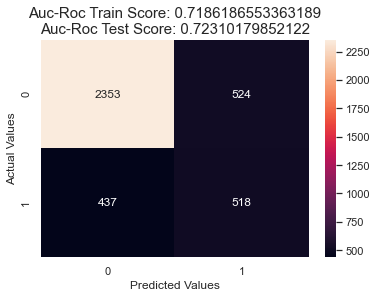

In [320]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

clf_gnb = GaussianNB()
y_test_predict_gnb = clf_gnb.fit(X_train, y_train).predict(X_test)
y_train_score_gnb = clf_gnb.predict_proba(X_train)[:,1]
y_test_score_gnb = clf_gnb.predict_proba(X_test)[:,1]



cm_gnb=confusion_matrix(y_test, y_test_predict_gnb)
sns.heatmap(cm_gnb, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Auc-Roc Train Score: {}\nAuc-Roc Test Score: {}'.format(roc_auc_score(y_train, y_train_score_gnb),roc_auc_score(y_test, y_test_score_gnb)), size = 15)
plt.show()

scores_df.loc["Naive Bayes",:] = [roc_auc_score(y_train, y_train_score_gnb),roc_auc_score(y_test, y_test_score_gnb)]

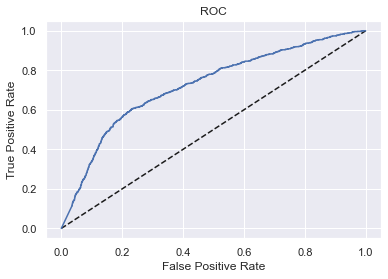

In [321]:
from sklearn.metrics import roc_curve

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_test_score_gnb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nb, tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### **--- Random Forest**

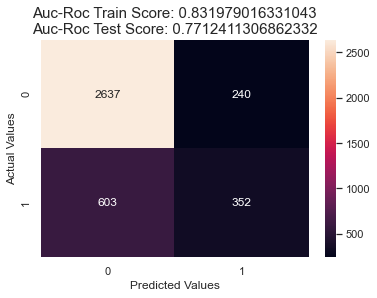

In [322]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=10, random_state=42)
clf_rf.fit(X_train, y_train)
y_test_predict_rf=clf_rf.predict(X_test)
y_train_score_rf = clf_rf.predict_proba(X_train)[:,1]
y_test_score_rf = clf_rf.predict_proba(X_test)[:,1]



cm_rf=confusion_matrix(y_test, y_test_predict_rf)
sns.heatmap(cm_rf, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Auc-Roc Train Score: {}\nAuc-Roc Test Score: {}'.format(roc_auc_score(y_train, y_train_score_rf),roc_auc_score(y_test, y_test_score_rf)), size = 15)
plt.show()

scores_df.loc["Random Forest",:] = [roc_auc_score(y_train, y_train_score_rf),roc_auc_score(y_test, y_test_score_rf)]

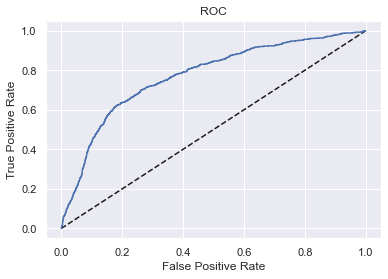

In [323]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_score_rf)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### **--- Gradient Boosting**

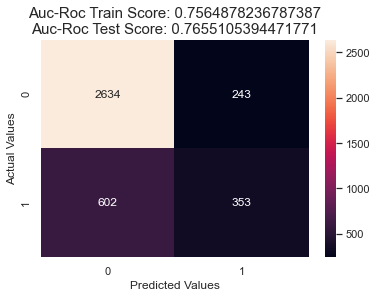

In [324]:
 from sklearn.ensemble import GradientBoostingClassifier
clf_gb=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0).fit(X_train, y_train)
y_test_predict_gb=clf_gb.predict(X_test)
y_train_score_gb = clf_gb.predict_proba(X_train)[:,1]
y_test_score_gb = clf_gb.predict_proba(X_test)[:,1]



cm_gb=confusion_matrix(y_test, y_test_predict_gb)
sns.heatmap(cm_gb, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Auc-Roc Train Score: {}\nAuc-Roc Test Score: {}'.format(roc_auc_score(y_train, y_train_score_gb),roc_auc_score(y_test, y_test_score_gb)), size = 15)
plt.show()

scores_df.loc["Gradient Boosting",:] = [roc_auc_score(y_train, y_train_score_gb),roc_auc_score(y_test, y_test_score_gb)]

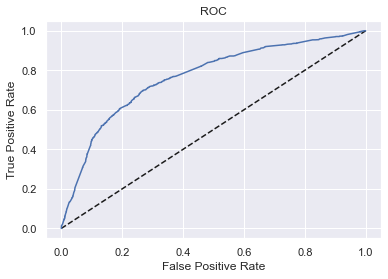

In [325]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_test_score_gb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb, tpr_gb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### **--- Histogram Based Boosting**

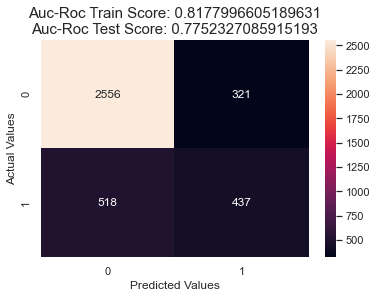

In [327]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
clf_hgb = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
y_test_predict_hgb=clf_hgb.predict(X_test)
y_train_score_hgb = clf_hgb.predict_proba(X_train)[:,1]
y_test_score_hgb = clf_hgb.predict_proba(X_test)[:,1]



cm_hgb=confusion_matrix(y_test, y_test_predict_hgb)
sns.heatmap(cm_hgb, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Auc-Roc Train Score: {}\nAuc-Roc Test Score: {}'.format(roc_auc_score(y_train, y_train_score_hgb),roc_auc_score(y_test, y_test_score_hgb)), size = 15)
plt.show()

scores_df.loc["Histogram Based Boosting",:] = [roc_auc_score(y_train, y_train_score_hgb),roc_auc_score(y_test, y_test_score_hgb)]

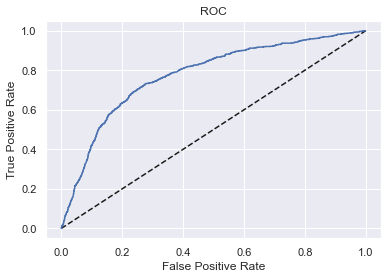

In [334]:
fpr_hgb, tpr_hgb, thresholds_hgb = roc_curve(y_test, y_test_score_hgb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_hgb, tpr_hgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## **3.1. Model Scores Comparison**

In [330]:
scores_df["Difference"]=(scores_df["Train"]-scores_df["Test"])

In [331]:
scores_df.sort_values(by=['Difference'], ascending=True)

,Train,Test,Difference
Gradient Boosting,0.756488,0.765511,-0.00902272
Naive Bayes,0.718619,0.723102,-0.00448314
Histogram Based Boosting,0.8178,0.775233,0.042567
Random Forest,0.831979,0.771241,0.0607379


### **3.2. Roc-Auc Compression**

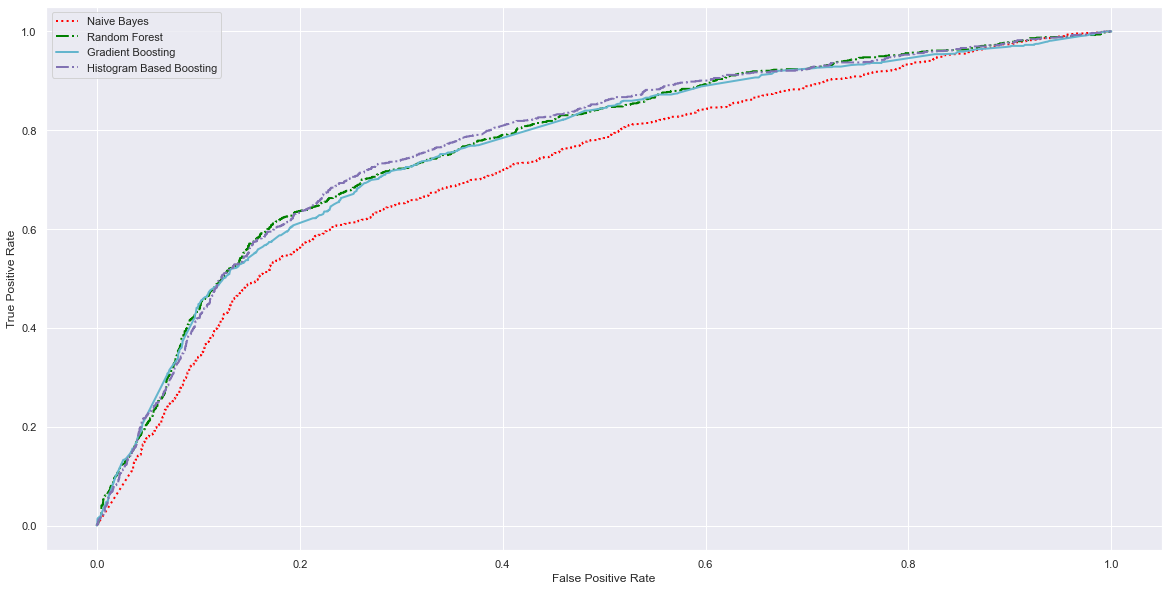

In [335]:
plt.figure(figsize=(20,10))
plt.plot(fpr_nb,tpr_nb,linestyle=':',label='Naive Bayes',color='red', linewidth=2)
plt.plot(fpr_rf, tpr_rf, linestyle='-.', color='green', label='Random Forest', linewidth=2)
plt.plot(fpr_gb, tpr_gb, linestyle='-', label='Gradient Boosting',color='c', linewidth=2)
plt.plot(fpr_hgb, tpr_hgb, linestyle='-.', label='Histogram Based Boosting',color='m', linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
1. Data Preprocessing
1.1. Data Structure Control 
1.2 Building the Target Variable 

2. Data Analysis
2.1. Outlier Handling
2.3. Missing Value Imputation
2.4. Normalization
2.5. Feature Importance

3. Modelling
3.1. Model Scores Comparison
3.2. Roc-Auc Compression


### **3.3. Predictions for Test Data**

In [339]:
test_data.head(1)

,enrollee_id,city_development_index,training_hours,city_city_100,city_city_101,city_city_103,city_city_104,city_city_11,city_city_114,city_city_115,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.971514,0.756487,0.089037,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [340]:
y_test

array([0., 1., 0., ..., 0., 0., 0.])

In [341]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
clf_hgb = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
test_predict_hgb=clf_hgb.predict(test_data)
y_train_score_hgb = clf_hgb.predict_proba(X_train)[:,1]
test_score_hgb = clf_hgb.predict_proba(test_data)[:,1]



In [342]:
test_predict_hgb

array([0., 0., 1., ..., 0., 0., 0.])

* After getting the target of test_data, we can compare with the predictions...

In [ ]:
"""

cm_hgb=confusion_matrix(test_data, test_predict_hgb)
sns.heatmap(cm_hgb, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Auc-Roc Train Score: {}\nAuc-Roc Test Score: {}'.format(roc_auc_score(y_train, y_train_score_hgb),roc_auc_score(test_data, test_score_hgb)), size = 15)
plt.show()

scores_df.loc["Histogram Based Boosting",:] = [roc_auc_score(y_train, y_train_score_hgb),roc_auc_score(y_test, test_score_hgb)]

"""